In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
import ipywidgets as widgets
from IPython.display import display

In [3]:
# Generate synthetic data
X,y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=101)# binary classification
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

# Train logistic regression
model = LogisticRegression() # S-shape 
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:,1] # Each prediction is a probabilty from 0 to 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [4]:
# Create a DataFrame with the true labels and predicted probabilities
probabilities_df = pd.DataFrame({
    "True Label": y_test,
    "Predicted Probability": y_probs 
})

# Display the first few rows
print(probabilities_df.head()) 

   True Label  Predicted Probability
0           0               0.001636
1           1               0.594413
2           0               0.150288
3           1               0.992838
4           0               0.012318


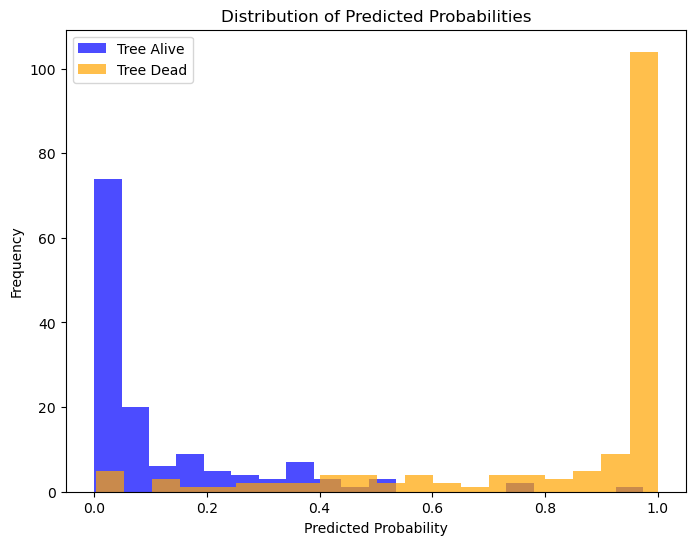

In [5]:
# Plot histograms for both classes
plt.figure(figsize=(8, 6))
plt.hist(probabilities_df[probabilities_df["True Label"] == 0]["Predicted Probability"], 
         bins=20, alpha=0.7, label="Tree Alive", color="blue")
plt.hist(probabilities_df[probabilities_df["True Label"] == 1]["Predicted Probability"], 
         bins=20, alpha=0.7, label="Tree Dead", color="orange")

# Add labels and title
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
#plt.axvline(x=0.5, color="red", linestyle="--", label="Default Threshold = 0.5")
plt.legend()
plt.show()

In [6]:
# Define the plotting function for threshold examination
def plot_roc_confusion_and_probs(threshold=0.5):
    plt.figure(figsize=(18, 6))
    
    # Subplot 1: ROC Curve
    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, label="ROC Curve", color="blue", lw=2)
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
    plt.scatter(fpr[np.argmax(thresholds <= threshold)], 
                tpr[np.argmax(thresholds <= threshold)], 
                color="red", label=f"Threshold = {threshold:.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    
    # Subplot 2: Confusion Matrix
    plt.subplot(1, 3, 2)
    y_pred = (y_probs >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"]).plot(cmap="Blues", ax=plt.gca())
    plt.title("Confusion Matrix")
    plt.grid(False)
    
    # Subplot 3: Histogram of Predicted Probabilities
    plt.subplot(1, 3, 3)
    plt.hist(y_probs[y_test == 0], bins=20, alpha=0.7, label="Class 0", color="blue")
    plt.hist(y_probs[y_test == 1], bins=20, alpha=0.7, label="Class 1", color="orange")
    plt.axvline(x=threshold, color="red", linestyle="--", label=f"Threshold = {threshold:.2f}")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.title("Histogram of Predicted Probabilities")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Create a slider widget
threshold_slider = widgets.FloatSlider(
    value=0.5,
    min=0.0,
    max=1.0,
    step=0.01,
    description="Threshold",
    continuous_update=False
)

# Link the slider to the plotting function
output = widgets.interactive_output(plot_roc_confusion_and_probs, {"threshold": threshold_slider})

# Display the slider and output together
display(widgets.VBox([threshold_slider, output]))